# Effects of Loan Characteristics on Lender Yield
## by Alexandria Thompson

## Investigation Overview

> In this investigation I looked at the loan characteristics that help to predict the lender yield. The main focus of this analysis was on term, listing category, estimated loss, estimated return, and loan original amount.

## Dataset Overview

> This data consisted of 113,937 loans with 81 loan characteristics. I chose to investigate several of the characteristics including lender yield, term, estimated loss, estimated return, propser score, loan original amount, listing category, number of investors, and debt to income ratio. The data points before July 2009 were removed because the prosper score was implemented at that time. 

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe and wrangle data
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Wrangle data
loans = loans[['Investors', 'ListingCategory (numeric)', 'ProsperScore', 'Term', 'LoanOriginalAmount', 'EstimatedLoss', 'EstimatedReturn', 'DebtToIncomeRatio', 'LenderYield']]
loans = loans.dropna(subset = ['ProsperScore'])
loans = loans.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'})
loans['ListingCategory'] = loans['ListingCategory'].astype(str)
loans['Term'] = loans['Term'].astype(str)
loans['ListingCategory'] = loans['ListingCategory'].replace({'0': 'NA', '1': 'DebtConsolidation', 
                                                             '2': 'HomeImprovement', '3': 'Business', '4': 'PersonalLoan', 
                                                             '5': 'StudentUse', '6':'Auto', '7':'Other', '8':'Baby&Adoption', 
                                                            '9':'Boat', '10':'CosmeticProcedure', '11':'EngagementRing', '12':'GreenLoans',
                                                            '13':'HouseholdExpenses', '14':'LargePurchases', '15':'MedicalDental',
                                                            '16':'Motorcycle', '17':'RV', '18':'Taxes', '19':'Vacation', '20':'WeddingLoans'})
loans = loans[loans['ProsperScore'] <= 10]



## Distribution of Lender Yield

> Lender yield has a large portion of the data between the values 0.05 and 0.20. The shape of the lender yield distribution is bimodal, as it has two large peaks before 0.15 and one at 0.30.  

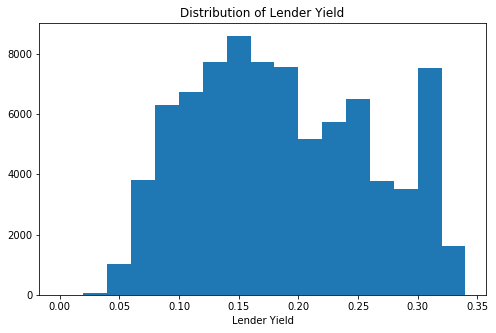

In [4]:
# Histogram lender yield
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)

plt.hist(data = loans, x = 'LenderYield', bins = bins)
plt.title('Distribution of Lender Yield')
plt.xlabel('Lender Yield')
plt.show();

## Lender Yield vs. Prosper Score

> The lender yield has a negative relationship with prosper score, as the prosper score increases the lender yield decreases. This may be attributed to the loans with higher prosper scores having less risk, therefore lower lender yields.  

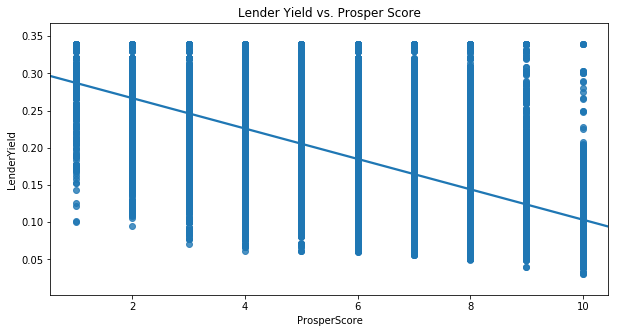

In [6]:
# Regplots of lender yield vs. prosper score
plt.figure(figsize=(10, 5))
color = sb.color_palette()[0]

sb.regplot(data = loans, x = 'ProsperScore', y = 'LenderYield', color = color)
plt.title('Lender Yield vs. Prosper Score');

## Lender Yield vs. Loan Original Amount

> After appyling the jitter and transparency to this regplot it is easier to the relationship between lender yield and loan orginal amount. The lender yield steadily decreases up to loan amount of 10,000 after 15,000 there is a much more drastic drop in the lender yield. 

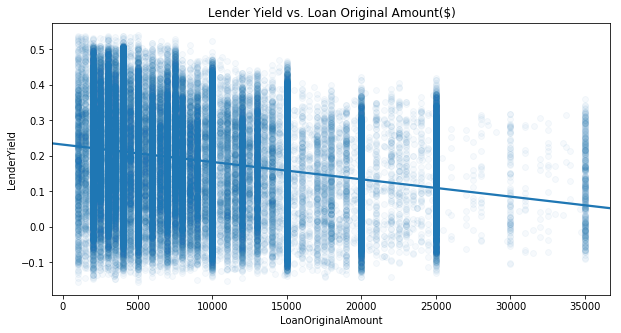

In [25]:
# Regplot lender yield vs. loan original amount with transparency and jitter
plt.figure(figsize=(10, 5))

sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'LenderYield',
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/25})
plt.title('Lender Yield vs. Loan Original Amount($)');

## Lender Yield vs. Estimated Return

> The lender yield and estimated return have a positive relationship where the lender yield increases as the estimated return increases. This relationship makes sense because if there is loan with higher return the investor will have a higher yield as well. 

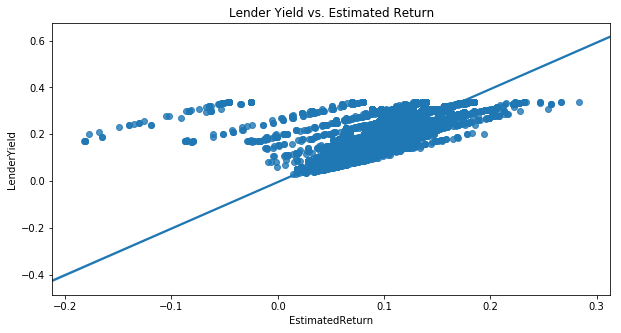

In [9]:
# Regplots of lender yield vs. estimated return
plt.figure(figsize=(10, 5))
color = sb.color_palette()[0]

sb.regplot(data = loans, x = 'EstimatedReturn', y = 'LenderYield', color = color)
plt.title('Lender Yield vs. Estimated Return');

## Lender Yield vs. Estimated Loss

> The lender yield and estimated loss have a postive relationship as well so as the lender yield increases the estimatd loss also increases. This shows that the loans with higher lender yields also have more risk because they have higher estimated losses. 

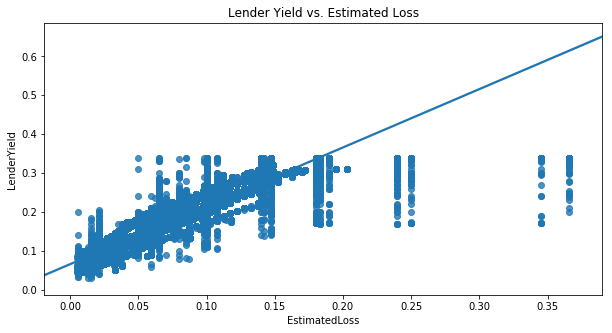

In [19]:
# Regplots of lender yield vs. estimated loss
plt.figure(figsize=(10, 5))
color = sb.color_palette()[0]

sb.regplot(data = loans, x = 'EstimatedLoss', y = 'LenderYield', color = color)
plt.title('Lender Yield vs. Estimated Loss');

## Lender Yield vs. Term

>The 12 month term has the lowest lender yield and more mild increases and decreases than the other two terms. The 36 month term has the highest lender yield with a sharp increase around 0.30, but it also has the largest range of all three terms. The 60 month term has an extreme increase around 0.10 and then starts to decrease around 0.20. The 60 month term does not have any lender yields below 0.07. 


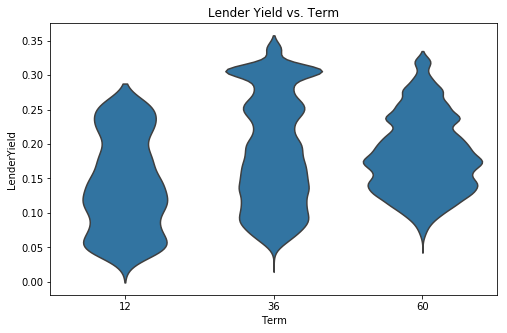

In [11]:
# Violin plot lender yield vs. term
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.violinplot(data = loans, x = 'Term', y = 'LenderYield', color = color, inner = None)
plt.title('Lender Yield vs. Term');

## Lender Yield vs. Estimated Return on 12, 36 and 60 Month Terms

>In the faceted heat maps you can see that the majority of the loans have low estimated return and low lender yield. The positive relationship between lender yield and estimated return is displayed. The estimated return and lender yield are lowest in the 12 month term, while 36 the month term has the highest lender yield. The first two terms have lender yields that differ but the estimated return is very similar for these terms. 

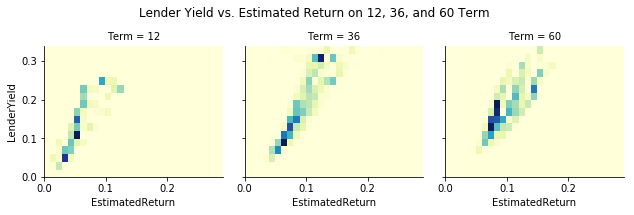

In [24]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['EstimatedReturn'].max()+0.01, 0.01)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)
    
# Plot faceted heat map of lender yield and estimated return on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'EstimatedReturn', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('EstimatedReturn')
g.set_ylabels('LenderYield')
g.fig.subplots_adjust(top=0.8) # Adjust so title does not overlap labels
g.fig.suptitle('Lender Yield vs. Estimated Return on 12, 36, and 60 Term')

plt.show();

## Lender Yield vs. Estimated Loss on 12, 36, and 60 Month Terms
>The estimated loss increases as the lender yield increases. The lender yield increases as the term increases, but similar to the previous heat maps there is not a systematic pattern for the increase. The 60 month term has the most loans with a higher lender yield, but about the same estimated loss as the other two terms. The estimated loss remains close to the same in all three terms. 

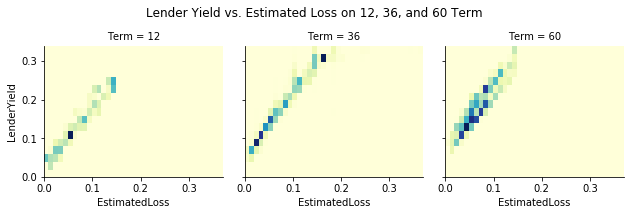

In [23]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['EstimatedLoss'].max()+0.01, 0.01)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)
    
# Plot faceted heat map of lender yield and estimated loss on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'EstimatedLoss', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('EstimatedLoss')
g.set_ylabels('LenderYield')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Lender Yield vs. Estimated Loss on 12, 36, and 60 Term')

plt.show();

## Lender Yield vs. Prosper Score on 12, 36, and 60 Month Terms
>These maps display the negative relationship between lender yield and prosper score, where lender yield decreases as prosper score increases. It is interesting to see that as the term increases the lender yield increases and then decreases more and the prosper score increases more. The loans with 36 month terms still remain with the highest lender yield similar to the other heat maps. 

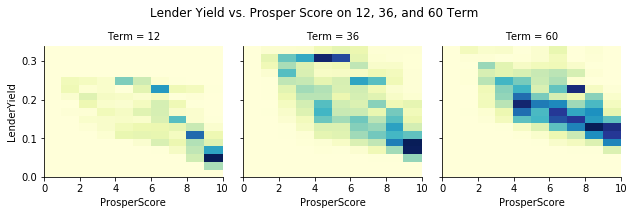

In [22]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['ProsperScore'].max()+1, 1)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)
    
# Plot faceted heat map of lender yield and prosper score on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'ProsperScore', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('ProsperScore')
g.set_ylabels('LenderYield')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Lender Yield vs. Prosper Score on 12, 36, and 60 Term')

plt.show();

## Lender Yield vs. Loan Original Amount on 12, 36, and 60 Month Terms
>From the faceted heat maps we can see that the 12 month term has a large range of lender yields all along low loan amounts, while the 36 month term has high lender yields at low loan amounts. The 60 month term has a range of lender yields at higher loan amounts, which makes sense that higher loan amounts would have longer terms. 

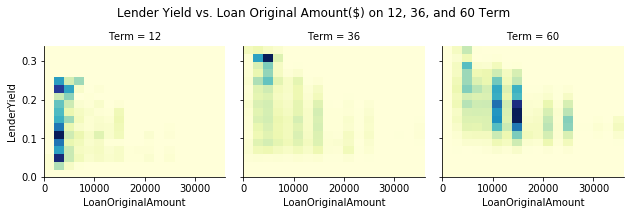

In [26]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['LoanOriginalAmount'].max()+2000, 2000)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)
    
# Plot faceted heat map of lender yield and loan original amount on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('LenderYield')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Lender Yield vs. Loan Original Amount($) on 12, 36, and 60 Term')

plt.show();